# Vehicle Car Sales Project 
 This is an analysis of used car listings which will include EDA, scatter plots, and histograms to show a possible correlation between the percentage of 4wd models offered by car brands and the average sale price of their cars. 

In [142]:
import pandas as pd
import streamlit as st
import plotly.express as px 
import altair as alt
import matplotlib.pyplot as plt
import numpy as np

The data has some minor issues that make it hard to read. First i will split the make and model into separate columns and move them so one comes directly after the other. 

In [143]:
file_path = "/Users/kevin/Documents/projects/project_4/vehicles_us.csv"

vehicles = pd.read_csv(file_path)

vehicles[['make', 'model']] = vehicles['model'].str.split(n=1, expand=True)

print(vehicles.head(10))

   price  model_year    model  condition  cylinders fuel  odometer  \
0   9400      2011.0       x5       good        6.0  gas  145000.0   
1  25500         NaN    f-150       good        6.0  gas   88705.0   
2   5500      2013.0   sonata   like new        4.0  gas  110000.0   
3   1500      2003.0    f-150       fair        8.0  gas       NaN   
4  14900      2017.0      200  excellent        4.0  gas   80903.0   
5  14990      2014.0      300  excellent        6.0  gas   57954.0   
6  12990      2015.0    camry  excellent        4.0  gas   79212.0   
7  15990      2013.0    pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0  sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0    pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed      make  
0    automatic     SUV         NaN     1.0  2018-06-23           19       bmw  
1    automatic  pickup       white     1.0  2018-10-19           50  

In [144]:
columns = list(vehicles.columns)

columns.remove('make')

model_index = columns.index('model')

columns.insert(model_index, 'make')

vehicles = vehicles[columns]

print(vehicles.head(10))


   price  model_year      make    model  condition  cylinders fuel  odometer  \
0   9400      2011.0       bmw       x5       good        6.0  gas  145000.0   
1  25500         NaN      ford    f-150       good        6.0  gas   88705.0   
2   5500      2013.0   hyundai   sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford    f-150       fair        8.0  gas       NaN   
4  14900      2017.0  chrysler      200  excellent        4.0  gas   80903.0   
5  14990      2014.0  chrysler      300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota    camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda    pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0       kia  sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda    pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-

Now i will fill nan values with median and mean values of other entries in the same category. 

In [145]:
vehicles.fillna(
    vehicles.groupby('make')['model_year'].transform('median'),
    inplace=True
)

vehicles['cylinders'] = vehicles['cylinders'].fillna(
    vehicles.groupby('model')['cylinders'].transform('median')
)


vehicles['odometer'] = pd.to_numeric(vehicles['odometer'], errors='coerce')
vehicles['odometer'] = vehicles['odometer'].fillna(
    vehicles.groupby('model_year')['odometer'].transform('mean')
)

print(vehicles.head(10))

   price  model_year      make    model  condition  cylinders fuel  \
0   9400      2011.0       bmw       x5       good        6.0  gas   
1  25500         NaN      ford    f-150       good        6.0  gas   
2   5500      2013.0   hyundai   sonata   like new        4.0  gas   
3   1500      2003.0      ford    f-150       fair        8.0  gas   
4  14900      2017.0  chrysler      200  excellent        4.0  gas   
5  14990      2014.0  chrysler      300  excellent        6.0  gas   
6  12990      2015.0    toyota    camry  excellent        4.0  gas   
7  15990      2013.0     honda    pilot  excellent        6.0  gas   
8  11500      2012.0       kia  sorento  excellent        4.0  gas   
9   9200      2008.0     honda    pilot  excellent        6.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
0  145000.000000    automatic     SUV         NaN     1.0  2018-06-23   
1   88705.000000    automatic  pickup       white     1.0  2018-10-19   
2  110000.

In [146]:
unique_makes_sorted = sorted(vehicles['make'].unique())

print(unique_makes_sorted)


['acura', 'bmw', 'buick', 'cadillac', 'chevrolet', 'chrysler', 'dodge', 'ford', 'gmc', 'honda', 'hyundai', 'jeep', 'kia', 'mercedes-benz', 'nissan', 'ram', 'subaru', 'toyota', 'volkswagen']


To find the average price of each make i will group by make and calculate the average price of all models from that make. 

In [147]:
vehicles_cleaned = vehicles.dropna(subset=['price'])

average_price_per_make = vehicles_cleaned.groupby('make')['price'].mean().reset_index()

average_price_per_make.columns = ['make', 'Average Price']

average_price_per_make = average_price_per_make.sort_values(by='Average Price', ascending=False)

print(average_price_per_make)

             make  Average Price
13  mercedes-benz   34900.000000
15            ram   18183.618818
3        cadillac   17032.059006
8             gmc   15602.340622
4       chevrolet   14333.427104
11           jeep   12774.383420
7            ford   12697.651989
2           buick   11439.612546
1             bmw   10695.891386
17         toyota   10097.875115
14         nissan    9346.470387
16         subaru    8732.718553
12            kia    8616.570940
5        chrysler    8182.738663
6           dodge    8067.058167
9           honda    7317.624103
18     volkswagen    7257.406214
10        hyundai    7256.994885
0           acura    6474.500000


In [148]:
value_counts = vehicles['is_4wd'].value_counts()
print(value_counts)

vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)
print('\n')

value_counts = vehicles['is_4wd'].value_counts()
print(value_counts)

is_4wd
1.0    25572
Name: count, dtype: int64


is_4wd
0.0    25953
1.0    25572
Name: count, dtype: int64


Now i will merge the average price of each make with the percentage of 4wd cars they have, then i will plot charts to display any possible correlation. 

In [149]:

vehicles_4wd_cleaned = vehicles.dropna(subset=['is_4wd'])

percentage_4wd = vehicles_4wd_cleaned.groupby('make')['is_4wd'].mean().reset_index()

percentage_4wd['Percentage 4WD'] = percentage_4wd['is_4wd'] * 100

percentage_4wd = percentage_4wd[['make', 'Percentage 4WD']]

percentage_4wd = percentage_4wd.sort_values(by='Percentage 4WD', ascending=False)

print(percentage_4wd)
print('\n')

merged_df = pd.merge(average_price_per_make, percentage_4wd, on='make', how='inner')

print(merged_df)

st.header('Average Sale Price of Car Brands and Percentage of Their Cars That Are 4WD') 
st.dataframe(merged_df)

             make  Percentage 4WD
16         subaru       97.012579
1             bmw       91.011236
11           jeep       89.667784
3        cadillac       79.192547
15            ram       78.166466
8             gmc       76.198486
4       chevrolet       53.237207
7            ford       52.588384
2           buick       47.232472
17         toyota       33.663912
14         nissan       25.561097
12            kia       22.905983
9           honda       22.725968
6           dodge       19.681275
10        hyundai       11.508951
0           acura        8.050847
5        chrysler        7.279236
18     volkswagen        1.380898
13  mercedes-benz        0.000000


             make  Average Price  Percentage 4WD
0   mercedes-benz   34900.000000        0.000000
1             ram   18183.618818       78.166466
2        cadillac   17032.059006       79.192547
3             gmc   15602.340622       76.198486
4       chevrolet   14333.427104       53.237207
5            jeep   1277

DeltaGenerator()

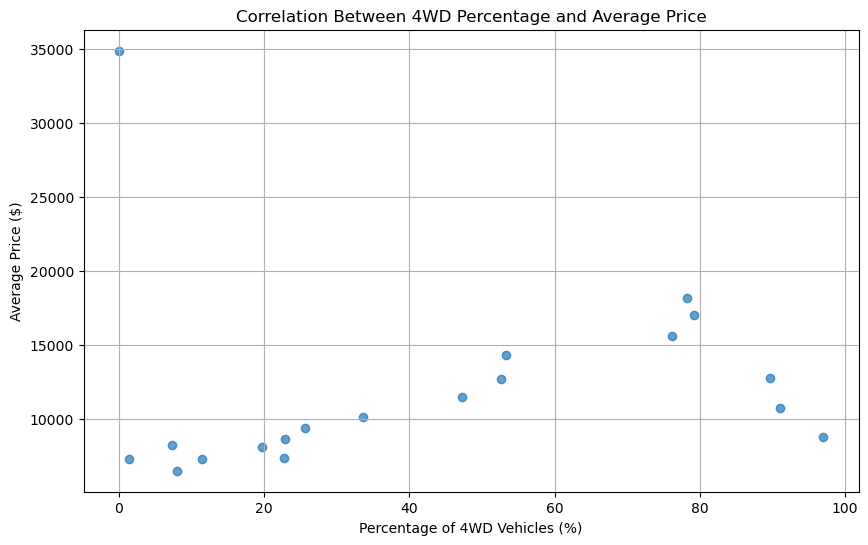

In [150]:
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Percentage 4WD'], merged_df['Average Price'], alpha=0.7)

plt.xlabel('Percentage of 4WD Vehicles (%)')
plt.ylabel('Average Price ($)')
plt.title('Correlation Between 4WD Percentage and Average Price')
plt.grid(True)

plt.show()

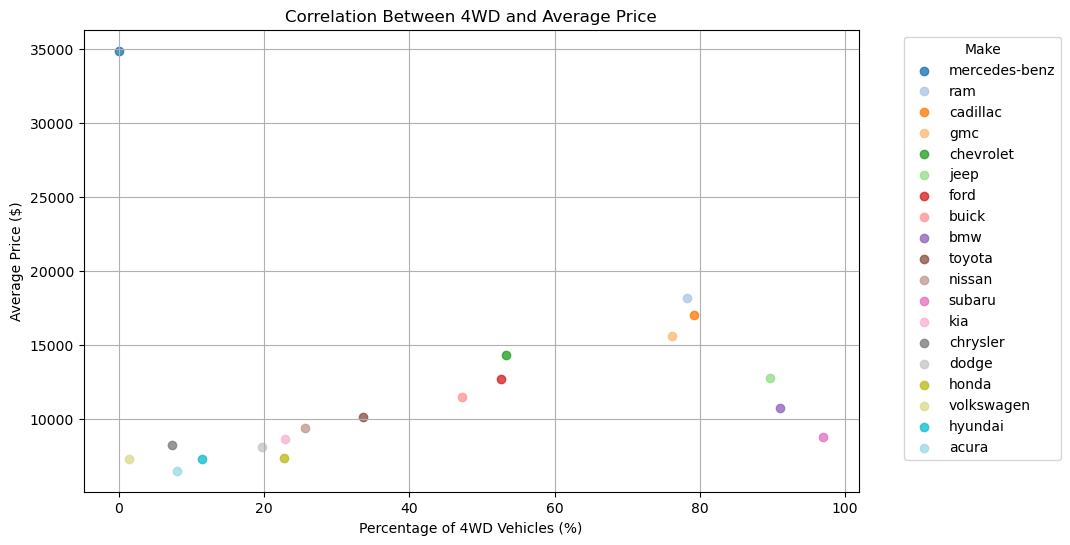

In [151]:

unique_makes = merged_df['make'].unique()

colors = plt.cm.tab20(np.linspace(0, 1, len(unique_makes)))

color_map = dict(zip(unique_makes, colors))

plt.figure(figsize=(10, 6))
for make in unique_makes:
    make_data = merged_df[merged_df['make'] == make]
    plt.scatter(
        make_data['Percentage 4WD'], 
        make_data['Average Price'], 
        color=color_map[make],
        label=make,
        alpha=0.8
    )

plt.xlabel('Percentage of 4WD Vehicles (%)')
plt.ylabel('Average Price ($)')
plt.title('Correlation Between 4WD and Average Price')
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside the plot
plt.grid(True)

# 6. Show the plot
plt.show()


In [152]:
fig = px.scatter(
    merged_df, 
    x='Percentage 4WD', 
    y='Average Price', 
    color='make',  
    hover_data=['make'], 
    title='Correlation Between 4WD Percentage and Average Price',
    labels={'Percentage 4WD': 'Percentage of 4WD Vehicles (%)', 'Average Price': 'Average Price ($)'}
)

st.plotly_chart(fig)

DeltaGenerator()

In [153]:
st.header("Car Price Distribution")

fig = px.histogram(
    merged_df, 
    x="Average Price", 
    nbins=10, 
    title="Distribution of Average Car Prices", 
    labels={"Average Price": "Car Price ($)"}
)

st.plotly_chart(fig)

DeltaGenerator()

In conclusion, we can see there is defintely a correlation where brands which have a higher percentage of 4wd cars have a higher average listing price as well. This suggests 4wd cars are more valuable than non 4wd models. 